In [70]:
%pylab inline
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/treillou/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['norm', 'sqrt', 'exp', 'det', 'outer', 'plot', 'pi', 'inner', 'info', 'solve', 'cross', 'diff', 'split', 'gamma', 'sin', 'inv', 'tan', 'dot', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [80]:
#Rayon rho
r=0.35

#Nx=Ny=N
N=50

#Paramètres mu             #mu0 entre 0.1 et 10
mu = np.array([10,-1])     #mu1 entre  -1 et 1


def Solver(mu0,mu1,N=50,r=0.2):
    mu = np.array([mu0,mu1])
    # Create classes for defining parts of the boundaries and the interior
    # of the domain
    class Left(SubDomain):
        def inside(self, x, on_boundary):
            return near(x[0], 0.0)

    class Right(SubDomain):
        def inside(self, x, on_boundary):
            return near(x[0], 1.0)

    class Bottom(SubDomain):
        def inside(self, x, on_boundary):
            return near(x[1], 0.0)

    class Top(SubDomain):
        def inside(self, x, on_boundary):
            return near(x[1], 1.0)

    class Gamma0(SubDomain):
        def inside(self, x, on_boundary):
            return (x[1]-0.5)**2<=r**2-(x[0]-0.5)**2 and (x[1]-0.5)**2<=r**2-(x[0]-0.5)**2

    # Initialize sub-domain instances
    left   = Left()
    top    = Top()
    right  = Right()
    bottom = Bottom()
    gamma  = Gamma0()

    # Define mesh
    mesh = UnitSquareMesh(N,N)

    # Initialize mesh function for interior domains
    domains = MeshFunction("size_t", mesh, mesh.topology().dim())
    domains.set_all(0)         #domains 0 = all space
    gamma.mark(domains, 1)     #domains 1 = all gamma0

    # Initialize mesh function for boundary domains
    boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1) #1d domains
    boundaries.set_all(0)      #boundaries 0 = all boundaries
    left.mark(boundaries, 1)   #boundaries 1 = left (Neumann)
    top.mark(boundaries, 2)    #boundaries 2 = top (Dirichlet)
    right.mark(boundaries, 3)  #boundaries 3 = right (Neumann)
    bottom.mark(boundaries, 4) #boundaries 4 = bottom (Neumann parametrized)

    # Define input data
    a1 = Constant(mu[0])  
    a2 = Constant(mu[1])

    # Define function space and basis functions
    V = FunctionSpace(mesh, "CG", 1)
    u = TrialFunction(V)
    v = TestFunction(V)

    # Define Dirichlet boundary conditions at top and bottom boundaries
    bcs = [DirichletBC(V, 0.0, boundaries, 2)]

    # Define new measures associated with the interior domains and
    # exterior boundaries
    dx = Measure('dx', domain=mesh, subdomain_data=domains)
    ds = Measure('ds', domain=mesh, subdomain_data=boundaries)

    # Separate left and right hand sides of equation
    a = inner(grad(u),grad(v))*dx(0) + inner(a1*grad(u),grad(v))*dx(1)
    L = a2*v*ds(4)

    # Solve problem
    u = Function(V)
    solve(a == L, u, bcs)
    return u

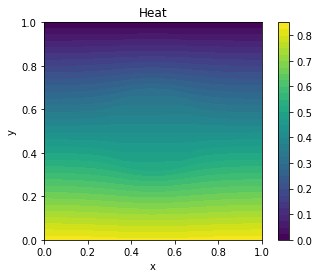

In [82]:
u = Solver(2,0.9)

# Plot solution
plt.figure()
c = plot(u, title="Heat")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(c)
plt.show()

Traceback (most recent call last):
  File "/home/treillou/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/treillou/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/home/treillou/anaconda3/envs/fenicsproject/lib/python3.8/site-packages/matplotlib/animation.py", line 1525, in _init_draw
    artist.set_visible(False)
AttributeError: 'TriContourSet' object has no attribute 'set_visible'


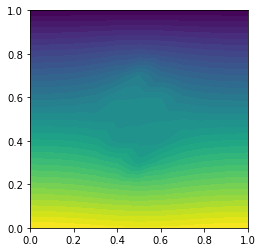

In [66]:
import matplotlib.animation as animation
mu1 = np.linspace(-1,1,10)
mu0 = np.linspace(0.1,10,10)
U = []
n = 0
fig = plt.figure()
ims = []
for i in range(10):
    for j in range(10):
            im=plot(Solver(mu0[i],mu1[j],N=10),animated=True)
            ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

plt.show()